## Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
sns.set()

## Import Data

In [46]:
file_path = "C:/Users/Souhar/OneDrive/Desktop/Christ programming/MDS372(Machine Learning)/Final Project/Dataset/Merged_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

In [47]:
df.head()

,Slno,Area,Year,Rural population,Urban population,Urbanization Rate,"Abaca, manila hemp, raw","Agave fibres, raw, n.e.c.","Almonds, in shell","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",...,Cropland,Farm buildings and Farmyards,Perm. meadows & pastures - Cultivated,Perm. meadows & pastures - Nat. growing,Permanent crops,Permanent meadows and pastures,Temporary crops,Temporary fallow,Temporary meadows and pastures,Nutrient balance
0,0,Afghanistan,2020,28150.604,9904.337,0.351834,0.0,0.0,39307.0,17965.90,...,8051.000,0.00,0.0,30262.0,222.000,30262.0,3834.0,3995.0,0.0,1.575433
1,1,Afghanistan,2021,28674.023,10239.684,0.357107,0.0,0.0,64256.0,17876.49,...,8051.000,0.00,0.0,30262.0,222.000,30262.0,3834.0,3995.0,0.0,1.844533
2,2,Afghanistan,2022,29191.512,10587.583,0.362694,0.0,0.0,63515.0,17883.38,...,8051.000,0.00,0.0,30262.0,222.000,30262.0,3834.0,3995.0,0.0,2.193200
3,3,Albania,2020,1114.672,1827.362,1.639372,0.0,0.0,0.0,0.00,...,687.555,1.79,0.0,0.0,87.955,478.0,196.6,178.0,225.0,42.048833
4,4,Albania,2021,1090.487,1854.317,1.700449,0.0,0.0,0.0,0.00,...,687.530,1.87,0.0,0.0,87.630,448.8,200.9,179.3,219.7,37.402333


In [48]:
df.describe()

c:\Users\Souhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Slno,Year,Rural population,Urban population,Urbanization Rate,"Abaca, manila hemp, raw","Agave fibres, raw, n.e.c.","Almonds, in shell","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",Apples,...,Cropland,Farm buildings and Farmyards,Perm. meadows & pastures - Cultivated,Perm. meadows & pastures - Nat. growing,Permanent crops,Permanent meadows and pastures,Temporary crops,Temporary fallow,Temporary meadows and pastures,Nutrient balance
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02,5.400000e+02,5.400000e+02,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,269.500000,2020.994444,18402.112402,24083.508439,inf,602.973611,203.200167,2.162174e+04,1.470222e+04,5.121910e+05,...,8544.949956,92.042700,455.456236,5591.905631,1014.595528,17256.686618,5892.861232,881.122894,757.030709,35.335934
std,156.028843,0.818369,79506.102275,81270.533080,NaN,5813.186618,1332.501162,1.645362e+05,1.377902e+05,3.465755e+06,...,22743.179206,974.764757,1880.102170,30599.522500,2973.830678,49429.525041,16829.978521,2645.417524,3516.515644,80.348701
min,0.000000,2020.000000,0.000000,13.223000,0.154005,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148500,0.000000,0.000000,-247.725000
25%,134.750000,2020.000000,643.847500,1508.485250,0.750042,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,191.400000,0.000000,0.000000,0.000000,23.937500,190.000000,107.442075,8.389200,0.218900,3.816167
50%,269.500000,2021.000000,2625.781000,5089.279500,1.637758,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,1749.000000,0.000000,0.000000,0.000000,132.000000,1350.000000,1004.456800,90.250000,35.839450,17.957383
75%,404.250000,2022.000000,11378.744250,16028.818000,3.654137,0.000000,0.000000,0.000000e+00,0.000000e+00,1.558825e+05,...,6091.111550,0.000000,0.000000,3.400000,600.000000,11000.000000,4108.476925,449.481075,336.477700,39.594933
max,539.000000,2022.000000,905110.427000,910080.750000,inf,68702.460000,14920.430000,2.345070e+06,1.876972e+06,4.757180e+07,...,168047.948000,13232.128700,20867.100000,371965.900000,27447.713000,392833.000000,141632.612500,25011.725000,44453.032000,851.754167


## Data Preprocessing

### <b>Dropping "Unnamed: 0"

In [49]:
df=df.drop("Slno",axis=1)

### <b>Imputing inf values in "Urbanization Rate"

In [50]:
df["Urbanization Rate"].max()

inf

In [51]:
df["Urbanization Rate"].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Souhar\AppData\Local\Temp\ipykernel_39216\1678373089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Urbanization Rate"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [52]:
df["Urbanization Rate"]=df["Urbanization Rate"].fillna(df["Urbanization Rate"].mean())

In [53]:
df["Urbanization Rate"].max()

145.5944081

In [54]:
df=df.drop(["Rural population","Urban population"],axis=1)

Dropping urban and rural polulation columns as they are directly related to urbanization rate to prevent data leakage

### <b>Missing value check

In [55]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

No missing values

### <b>Drop "Area"

In [56]:
df1=df.copy()

In [57]:
countries=df1["Area"]

In [58]:
df1=df1.drop("Area",axis=1)

### <b>Multicollinearity

<b>Checking for high correlation features


In [59]:

corr_matrix = df1.corr()

high_corr_threshold = 0.7

high_corr_pairs = (
    corr_matrix.where(abs(corr_matrix) > high_corr_threshold) 
    .stack()  
    .reset_index()
)

high_corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

# Remove duplicate pairs (since correlation is symmetric)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Feature 1"] != high_corr_pairs["Feature 2"]]

high_corr_pairs.sort_values(by="Correlation", ascending=False)


,Feature 1,Feature 2,Correlation
2316,"Meat of geese, fresh or chilled",Mushrooms and truffles,0.999789
2746,Mushrooms and truffles,"Meat of geese, fresh or chilled",0.999789
5147,Agriculture,Agricultural land,0.999767
5129,Agricultural land,Agriculture,0.999767
4387,Spinach,Tallowtree seeds,0.999531
...,...,...,...
2428,"Meat of mules, fresh or chilled","Horse meat, fresh or chilled",0.700475
922,"Cinnamon and cinnamon-tree flowers, raw","Tangerines, mandarins, clementines",0.700320
4614,"Tangerines, mandarins, clementines","Cinnamon and cinnamon-tree flowers, raw",0.700320
4230,"Sheep fat, unrendered","Meat of rabbits and hares, fresh or chilled",0.700198


Several feataures have high inter correlation that might result in multicollinearity. We drop one of all such features 

### <b>Dropping highly correlated features

In [60]:
# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

features_to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop the identified features
df1 = df1.drop(columns=features_to_drop)

print(f"Removed {len(features_to_drop)} highly correlated features.")


Removed 164 highly correlated features.


### <b>Checking for high VIF  

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop columns with all NaN or constant values (to avoid errors)
df1 = df1.dropna(axis=1, how='all')  
df1 = df1.loc[:, (df1 != df1.iloc[0]).any()]  

# Drop rows with NaN values (optional, but ensures no errors in VIF calculation)
df1 = df1.dropna()

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df1.columns
vif_data["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Filter only features with VIF > 5
vif_high = vif_data[vif_data["VIF"] > 10]

# Display high VIF features
print(vif_high)
print()
print("No. of high VIF columns:", vif_high.shape[0])


                      Feature        VIF
0                        Year  83.163849
22         Coconuts, in shell  20.520916
30                  Hop cones  16.657096
54                    Sorghum  15.102168
4           Almonds, in shell  12.879324
20  Cloves (whole stems), raw  12.802772
52                        Rye  12.229651

No. of high VIF columns: 7


In [62]:
features_to_exclude = vif_high[vif_high["Feature"] != "Year"]["Feature"].tolist()
features_to_exclude

['Coconuts, in shell',
 'Hop cones',
 'Sorghum',
 'Almonds, in shell',
 'Cloves (whole stems), raw',
 'Rye']

In [63]:
df1=df1.drop(columns=features_to_exclude)

In [64]:
df1

,Year,Urbanization Rate,"Abaca, manila hemp, raw","Agave fibres, raw, n.e.c.","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",Apples,Apricots,Artichokes,Avocados,"Bambara beans, dry",...,Sesame seed,Sour cherries,"Vanilla, raw",Yautia,Food Price Index,Average dietary energy requirement (kcal/cap/day),Percentage of children under 5 years affected by wasting (percent),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Nutrient balance
0,2020,0.351834,0.0,0.0,17965.90,270857.0,131788.00,0.00,0.0,0.00,...,41855.0,0.00,0.00,0.0,127.61,2134,0.0,22.6,27.7,1.575433
1,2021,0.357107,0.0,0.0,17876.49,321672.0,207490.00,0.00,0.0,0.00,...,19000.0,0.00,0.00,0.0,134.66,2138,0.0,28.4,29.4,1.844533
2,2022,0.362694,0.0,0.0,17883.38,318402.0,170508.00,0.00,0.0,0.00,...,41871.0,0.00,0.00,0.0,160.10,2140,3.6,30.6,30.4,2.193200
3,2020,1.639372,0.0,0.0,0.00,102167.0,5143.00,0.00,0.0,0.00,...,0.0,17848.67,0.00,0.0,117.50,2488,0.0,7.7,4.4,42.048833
4,2021,1.700449,0.0,0.0,0.00,111247.2,5056.70,0.00,0.0,0.00,...,0.0,17857.77,0.00,0.0,122.09,2489,0.0,7.5,4.3,37.402333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2021,0.824554,0.0,0.0,0.00,0.0,0.00,0.00,0.0,6757.73,...,0.0,0.00,0.00,0.0,225.87,2204,0.0,0.0,34.4,16.287567
536,2022,0.843684,0.0,0.0,0.00,0.0,0.00,0.00,0.0,5828.86,...,0.0,0.00,0.00,0.0,255.50,2209,0.0,0.0,35.4,17.131733
537,2020,0.475831,0.0,0.0,84.18,4347.0,45.03,303.88,84091.0,23832.00,...,5037.0,0.00,9.93,0.0,3644.44,2245,0.0,31.3,39.5,3.421333
538,2021,0.477176,0.0,0.0,84.20,4032.0,44.93,303.99,93280.0,37156.00,...,11802.0,0.00,9.92,0.0,7500.21,2251,0.0,28.6,38.9,4.174700


## <b>Feature Scaling(Standardization)

In [65]:
df2=df1.copy()

In [66]:
df2

,Year,Urbanization Rate,"Abaca, manila hemp, raw","Agave fibres, raw, n.e.c.","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",Apples,Apricots,Artichokes,Avocados,"Bambara beans, dry",...,Sesame seed,Sour cherries,"Vanilla, raw",Yautia,Food Price Index,Average dietary energy requirement (kcal/cap/day),Percentage of children under 5 years affected by wasting (percent),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Nutrient balance
0,2020,0.351834,0.0,0.0,17965.90,270857.0,131788.00,0.00,0.0,0.00,...,41855.0,0.00,0.00,0.0,127.61,2134,0.0,22.6,27.7,1.575433
1,2021,0.357107,0.0,0.0,17876.49,321672.0,207490.00,0.00,0.0,0.00,...,19000.0,0.00,0.00,0.0,134.66,2138,0.0,28.4,29.4,1.844533
2,2022,0.362694,0.0,0.0,17883.38,318402.0,170508.00,0.00,0.0,0.00,...,41871.0,0.00,0.00,0.0,160.10,2140,3.6,30.6,30.4,2.193200
3,2020,1.639372,0.0,0.0,0.00,102167.0,5143.00,0.00,0.0,0.00,...,0.0,17848.67,0.00,0.0,117.50,2488,0.0,7.7,4.4,42.048833
4,2021,1.700449,0.0,0.0,0.00,111247.2,5056.70,0.00,0.0,0.00,...,0.0,17857.77,0.00,0.0,122.09,2489,0.0,7.5,4.3,37.402333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2021,0.824554,0.0,0.0,0.00,0.0,0.00,0.00,0.0,6757.73,...,0.0,0.00,0.00,0.0,225.87,2204,0.0,0.0,34.4,16.287567
536,2022,0.843684,0.0,0.0,0.00,0.0,0.00,0.00,0.0,5828.86,...,0.0,0.00,0.00,0.0,255.50,2209,0.0,0.0,35.4,17.131733
537,2020,0.475831,0.0,0.0,84.18,4347.0,45.03,303.88,84091.0,23832.00,...,5037.0,0.00,9.93,0.0,3644.44,2245,0.0,31.3,39.5,3.421333
538,2021,0.477176,0.0,0.0,84.20,4032.0,44.93,303.99,93280.0,37156.00,...,11802.0,0.00,9.92,0.0,7500.21,2251,0.0,28.6,38.9,4.174700


In [67]:
from sklearn.preprocessing import MinMaxScaler

# Store the "Year" column separately before scaling
year_column = df2["Year"].values  

# Scale all other features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df2.drop(columns=["Year"]))

# Convert back to DataFrame
df2 = pd.DataFrame(scaled_features, columns=df2.columns[1:])  # Only feature columns

# Add back the "Year" column
df2.insert(0, "Year", year_column)  

print(df2.head())  # Check scaled data


   Year  Urbanization Rate  Abaca, manila hemp, raw  \
0  2020           0.001360                      0.0   
1  2021           0.001396                      0.0   
2  2022           0.001435                      0.0   
3  2020           0.010213                      0.0   
4  2021           0.010633                      0.0   

   Agave fibres, raw, n.e.c.  \
0                        0.0   
1                        0.0   
2                        0.0   
3                        0.0   
4                        0.0   

   Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw  \
0                                           0.009572                           
1                                           0.009524                           
2                                           0.009528                           
3                                           0.000000                           
4                                           0.000000                        

## <b>LSTM

## <b>Preparing data for LSTM

In [68]:
import numpy as np

# Convert DataFrame to numpy array
data = df2.values

# Define the number of time steps (sequence length)
time_steps = 5  # Adjust this based on your data and problem

# Prepare sequences for LSTM
X, y = [], []

# Extract "Prevalence of severe food insecurity" column index (you can check the exact index in df2)
target_col_index = df2.columns.get_loc("Prevalence of severe food insecurity in the total population (percent) (3-year average)")

# Loop through data and prepare sequences
for i in range(len(data) - time_steps):
    X.append(data[i:i+time_steps, :])  # Use all features except target column
    y.append(data[i + time_steps, target_col_index])  # Predict target column

# Convert lists to numpy arrays
X, y = np.array(X), np.array(y)

# Split into train and test sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (428, 5, 58), Test shape: (107, 5, 58)


### <b> Checking for auto correlation

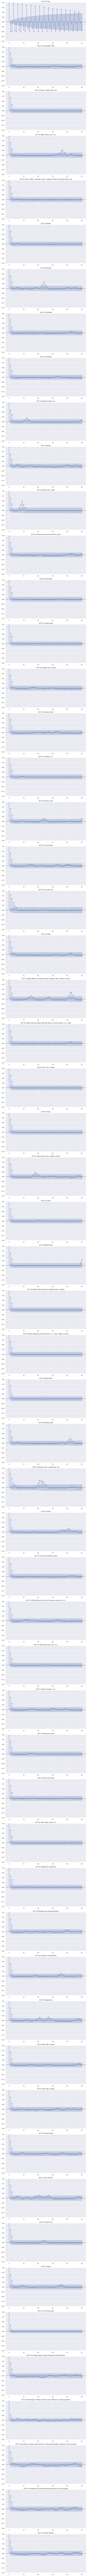

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

# Load your data into a pandas DataFrame
data = df2
# Set up the figure for plotting
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 5 * len(data.columns)))

# If you have a single column, axes might not be a list, so make sure to handle both cases
if len(data.columns) == 1:
    axes = [axes]

# Iterate through each column to plot ACF
for i, column in enumerate(data.columns):
    plot_acf(data[column], ax=axes[i], lags=50)  # Adjust lags as needed
    axes[i].set_title(f'ACF for {column}')
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## <b>Deploying model

In [70]:
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)  # Output layer for single prediction
])

# Compile the model
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate on test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


c:\Users\Souhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1045 - val_loss: 0.0643
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - val_loss: 0.0505
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - val_loss: 0.0483
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - val_loss: 0.0523
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - val_loss: 0.0503
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - val_loss: 0.0500
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - val_loss: 0.0490
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0488
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0523
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - val_loss: 0.0488
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - val_loss: 0.0492
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - val_l

### <b>Model accuracy

<b>RMSE

In [71]:
# Predict using the LSTM model
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002693B5E1EE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Root Mean Squared Error (RMSE): 0.2210729758272124


<b>R^2

In [72]:
r2 = r2_score(y_test, y_pred)

# Print R²
print(f"R² Score: {r2}")

R² Score: -0.013343756635072479


## <b>Hyperparameter tuning

In [73]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    
    # Add the first LSTM layer with hyperparameter tuning for the number of units
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                   return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Add a second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile the model with a learning rate to be tuned
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
                  loss='mse')
    
    return model


In [74]:
# Create the tuner instance (Random Search in this case)
tuner = kt.RandomSearch(
    build_model, 
    objective='val_loss',  # Optimize for validation loss
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=3,  # Number of executions per trial to reduce variance
    directory='my_dir',  # Directory to save results
    project_name='lstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)


Reloading Tuner from my_dir\lstm_tuning\tuner0.json
Best Hyperparameters: {'units_1': 128, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.2, 'learning_rate': 2.019818652901416e-05}


In [75]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE and R²
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


c:\Users\Souhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Souhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0648  
Test Loss: 0.048075318336486816
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Root Mean Squared Error (RMSE): 0.21926084875381663
R² Score: 0.0032008397902815178


## <b>Train test split for other models

In [76]:
# Define the features (X) and target (y)
X = df2.drop(columns=["Prevalence of severe food insecurity in the total population (percent) (3-year average)"])
y = df2["Prevalence of severe food insecurity in the total population (percent) (3-year average)"]


## <b>Using Random Forest

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R² score
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R²: {r2_rf}")


Random Forest - RMSE: 0.09021498526408064
Random Forest - R²: 0.7583195001847781


## <b>XG Boost

In [78]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")


XGBoost - RMSE: 0.08260928390021936
XGBoost - R²: 0.7973521686985227


## <b>SVM

In [79]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - RMSE: {rmse_svr}")
print(f"SVR - R²: {r2_svr}")


SVR - RMSE: 0.18998001819033114
SVR - R²: -0.07176629508628851


## <b>Final model selection

Based on R^2 and RMSE we choose XGBoost model for our purposes.

This model describes 79.7% of variation in the data and RMSE is very low i.e. 0.082

<b>Plotting errors vs y_test

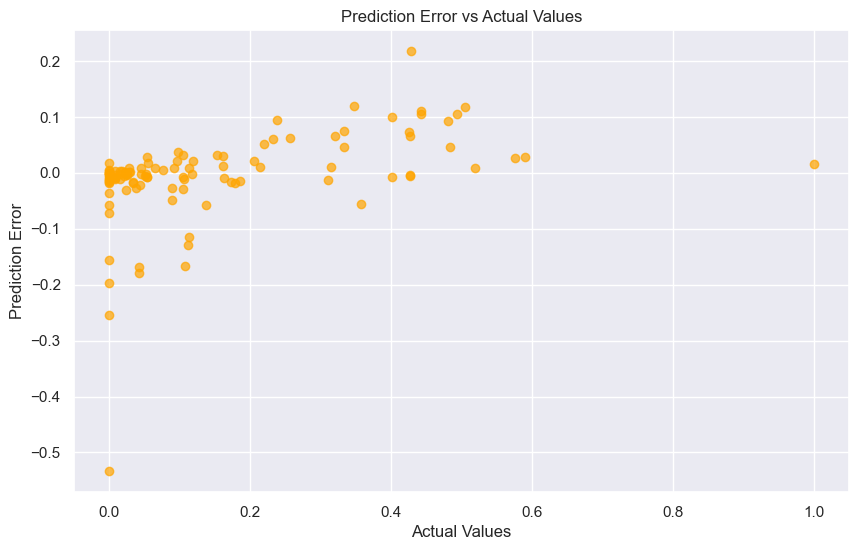

In [80]:
# Plot prediction errors
error = y_test - y_pred_xgb

plt.figure(figsize=(10, 6))
plt.scatter(y_test, error, alpha=0.7, color="orange")
plt.title("Prediction Error vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Prediction Error")
plt.show()


The plot is almost horizontal so we say that the predictions are consistent and not much over or underfitting is there.